In [1]:
#Checking the python version
from platform import python_version

print(python_version())

3.7.4


In [2]:
#Importing required librarires
import pandas as pd
import matplotlib as plt
import numpy as np
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lifetimes
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from datetime import datetime
from math import *
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

C:\Users\Gollamudi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.


In [3]:
#Importing data into a dataframe
txn_data = pd.concat(pd.read_excel('E:/Dataset/online_retail_II.xlsx', sheet_name=None), ignore_index=True)

In [4]:
#Displaying the first few records of data
txn_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#Checking the shape of data
txn_data.shape

(1067371, 8)

# Data Preprocessing and EDA

In [6]:
#Checking null values
txn_data.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

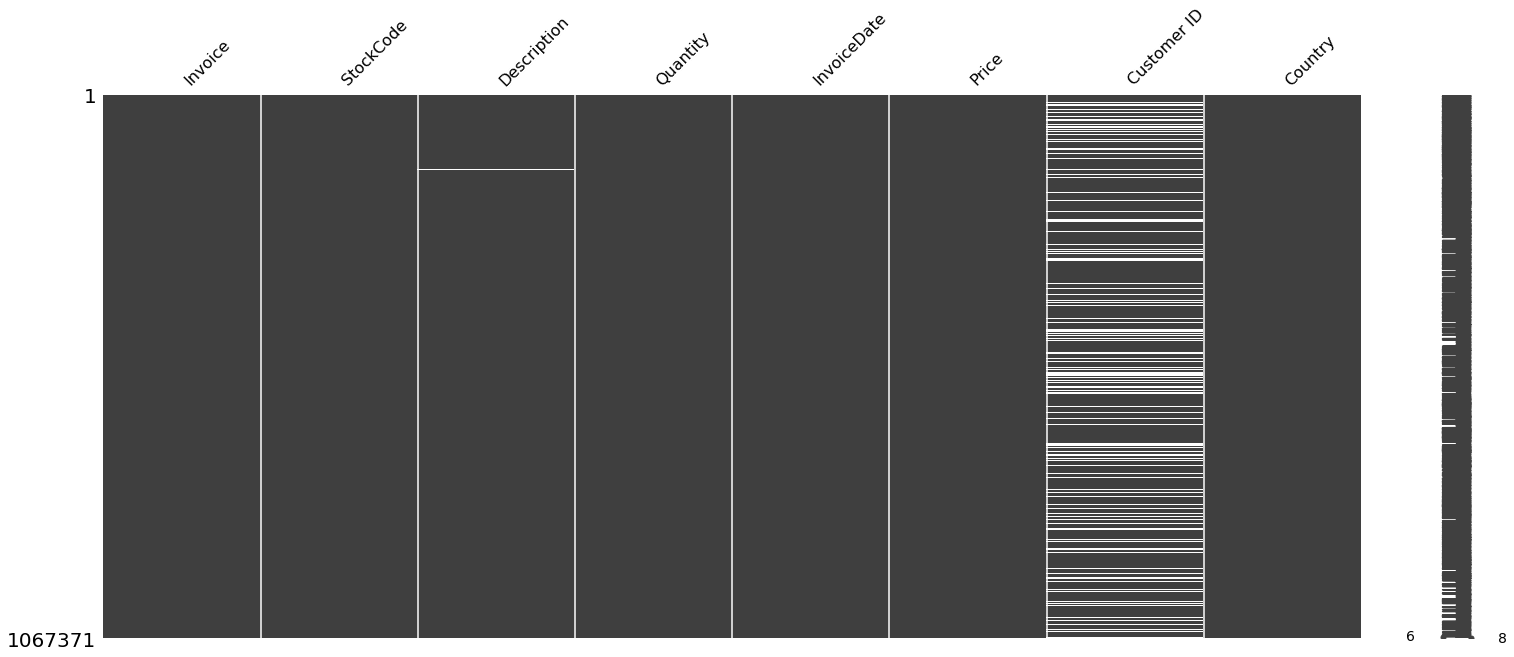

In [7]:
#In the above cell there are missing values in 2 columns, visualising those in the form of graph
msno.matrix(txn_data)

In [8]:
#Dropping NA values from Customer ID column, since there is no use of those records
txn_data= txn_data.dropna(subset=['Customer ID'])

In [9]:
#Checking the null values
txn_data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
#Verifying the duplicated records in the data
txn_data.duplicated().sum()

26479

In [11]:
#Removing the duplicated records, existence of these records may cause the models wrong prediction
txn_data = txn_data.drop_duplicates()

In [12]:
#Summary of the data
txn_data.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


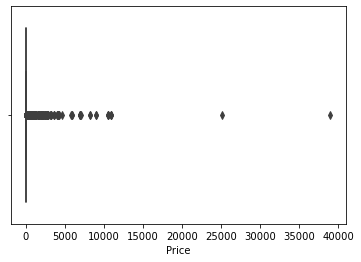

In [13]:
#Outliers Identification and Treatment
sns.boxplot(x=txn_data['Price'])

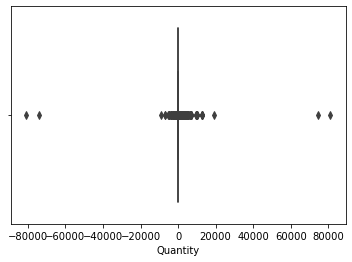

In [14]:
sns.boxplot(x=txn_data['Quantity'])

In [15]:
#IQR range to remove outliers
Q1 = txn_data.quantile(0.25)
Q3 = txn_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Quantity         10.0
Price             2.5
Customer ID    2824.0
dtype: float64


In [16]:
# Checking the skewnes for Price column
print(txn_data['Price'].skew())

306.24318953208103


In [17]:
txn_data['Price'].describe()

count    797885.000000
mean          3.702732
std          71.392549
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

In [18]:
# Checking the skewnes for Quantity column
print(txn_data['Quantity'].skew())

5.167440516193988


In [19]:
txn_data['Quantity'].describe()

count    797885.000000
mean         12.602980
std         191.670371
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [20]:
#Checking the quartile range of Price column in order to remove the skewness in the data
print(txn_data['Price'].quantile(0.10))
print(txn_data['Price'].quantile(0.90))

0.55
6.75


In [21]:
#Removing the skewness
txn_data["Price"] = np.where(txn_data["Price"] <0.55, 0.55,txn_data['Price'])
txn_data["Price"] = np.where(txn_data["Price"] >6.75, 6.75,txn_data['Price'])
print(txn_data['Price'].skew())

0.9854118762826481


In [22]:
#Checking the quartile range of Quantity column in order to remove the skewness in the data
print(txn_data['Quantity'].quantile(0.10))
print(txn_data['Quantity'].quantile(0.90))

1.0
24.0


In [23]:
#Removing the skewness
txn_data["Quantity"] = np.where(txn_data["Quantity"] <1.0, 1.0,txn_data['Quantity'])
txn_data["Quantity"] = np.where(txn_data["Quantity"] >24.0, 24.0,txn_data['Quantity'])
print(txn_data['Quantity'].skew())

1.1013842999278112


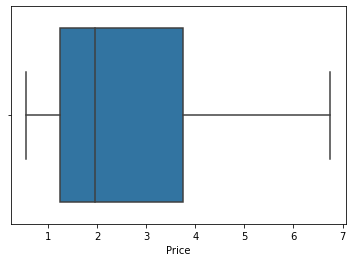

In [24]:
#After removing the outliers
sns.boxplot(x=txn_data['Price'])

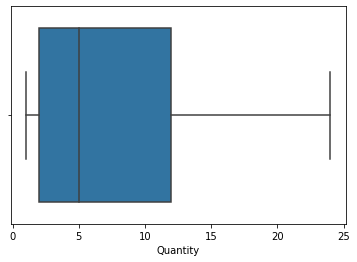

In [25]:
#After removing the outliers
sns.boxplot(x=txn_data['Quantity'])

In [26]:
#Keeping only positive records in other words we are ignoring the transactions which are cancelled
txn_data = txn_data[(txn_data['Quantity']>0)]

In [27]:
# Check the number of invoices that starts with letter 'c', cancellation.
txn_data['Invoice'] = txn_data['Invoice'].astype('str')
txn_data[txn_data['Invoice'].str.contains("c")].shape[0]

0

In [28]:
#Cretaing total revenue column
txn_data['Total_Revenue'] = txn_data['Quantity'] * txn_data['Price']

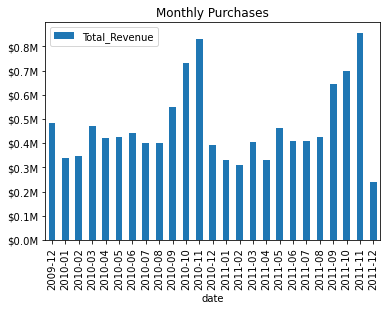

In [29]:
#Verifying the monthly purchases
import matplotlib.pyplot as plt
txn_data["date"] = txn_data["InvoiceDate"].dt.strftime("%Y-%m")
monthly_purchases = (
    txn_data.groupby(["date"])[["Total_Revenue"]]
    .agg("sum")
    .reset_index()
)
monthly_purchases = monthly_purchases.sort_values(by=["date"])


def millions(x, pos):
    "The two args are the value and tick position"
    return "$%1.1fM" % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
monthly_purchases.plot(
    kind="bar", x="date", y="Total_Revenue", ax=ax, title="Monthly Purchases"
)
plt.show()

In [30]:
#Converting date-time
txn_data['InvoiceDate'] = pd.to_datetime(txn_data.InvoiceDate, format = '%d/%m/%Y %H:%M')
txn_data['date'] = pd.to_datetime(txn_data.InvoiceDate.dt.date)
txn_data['time'] = txn_data.InvoiceDate.dt.time
txn_data['hour'] = txn_data['time'].apply(lambda x: x.hour)
txn_data['weekend'] = txn_data['date'].apply(lambda x: x.weekday() in [5, 6])
txn_data['dayofweek'] = txn_data['date'].apply(lambda x: x.dayofweek)

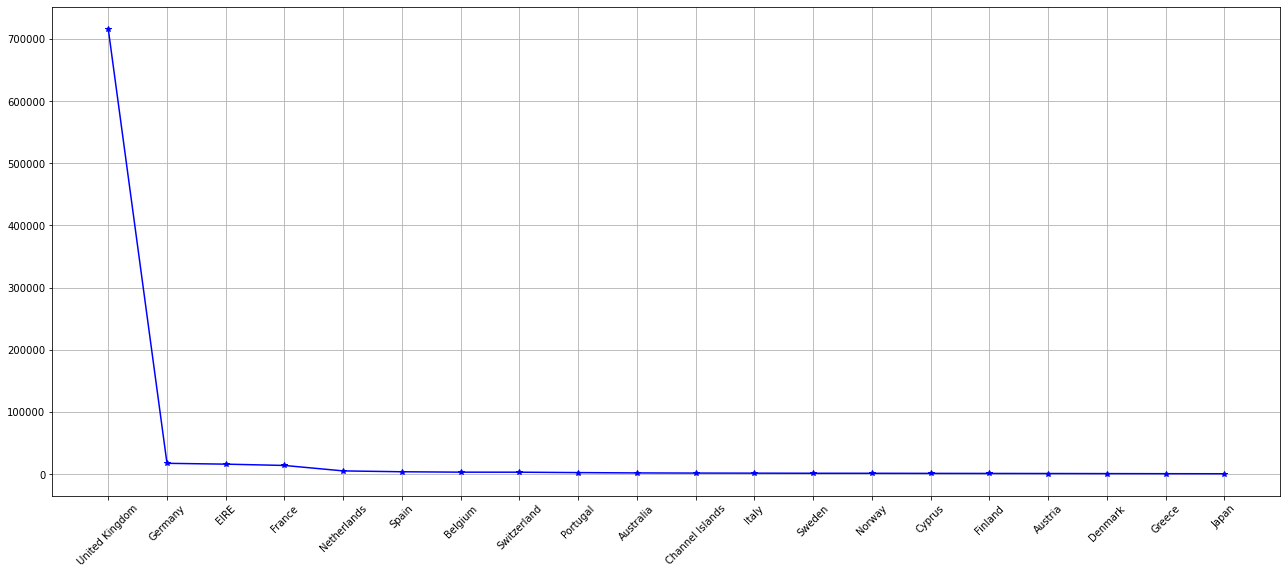

In [31]:
#Verifying the most purcahsed country
most_purchased_bycountry = pd.DataFrame(txn_data['Country'].value_counts().head(20)).rename(columns={'Price':'Count'})

plt.figure(figsize=(22,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry, 'b*-')
plt.grid()

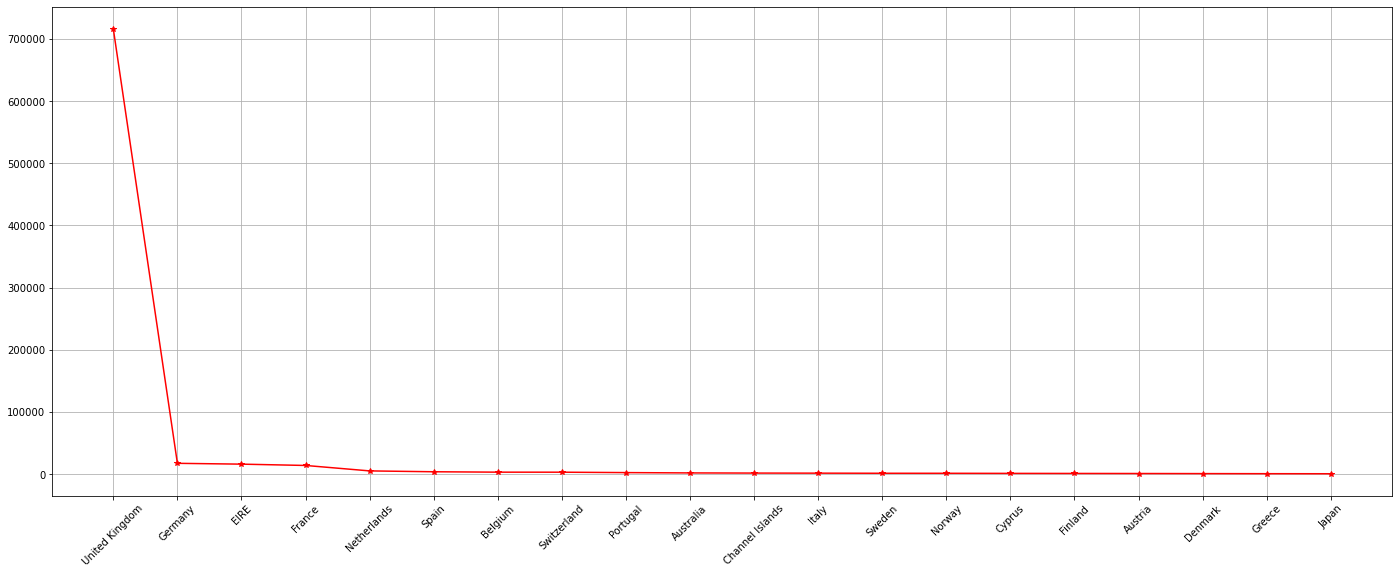

In [32]:
#Verifying the most purchased item
most_purchased_item = pd.DataFrame(txn_data['Description'].value_counts().head(20)).rename(columns={'Description':'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry, 'r*-')
plt.grid()

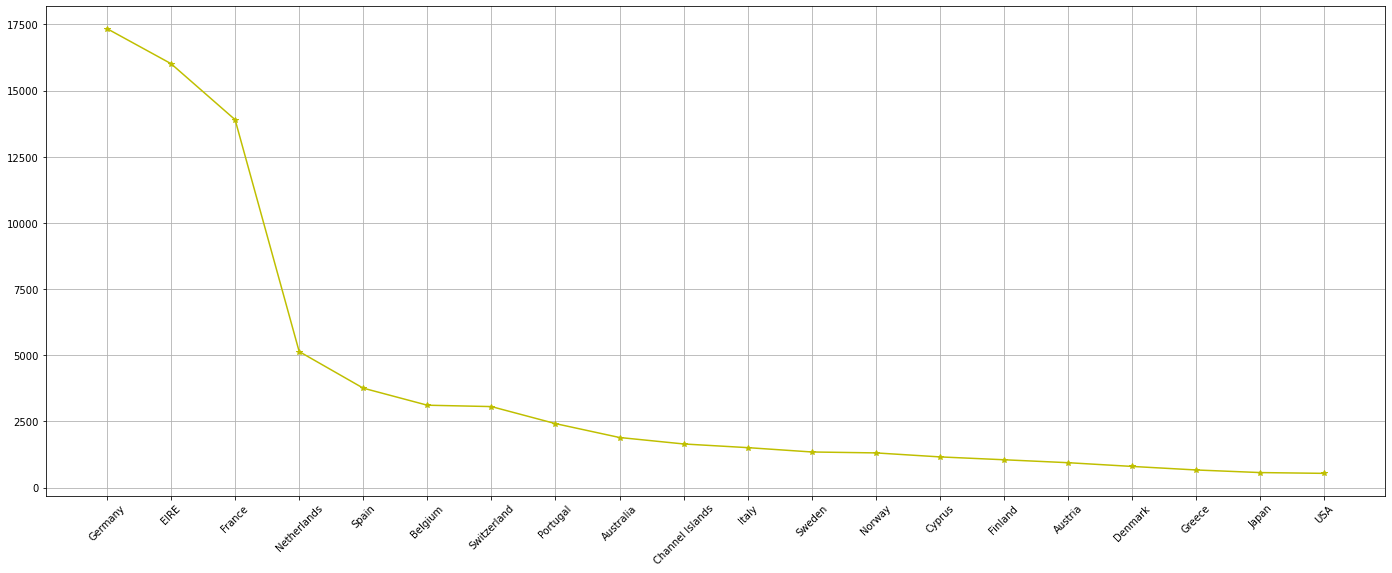

In [33]:
#Since the data consists of more UK purcahes, verifying the countries with more purchases other than the UK 
nonuk_df = txn_data[txn_data['Country'] != 'United Kingdom']
most_purchased_bycountry_nonuk = pd.DataFrame(nonuk_df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry_nonuk, 'y*-')
plt.grid()

In [34]:
#Taking only the required columns for further analysis
required_cols = ['Customer ID', 'InvoiceDate', 'Total_Revenue', 'Invoice', 'date']
tnx_data = txn_data[required_cols]
tnx_data.head()

,Customer ID,InvoiceDate,Total_Revenue,Invoice,date
0,13085.0,2009-12-01 07:45:00,81.0,489434,2009-12-01
1,13085.0,2009-12-01 07:45:00,81.0,489434,2009-12-01
2,13085.0,2009-12-01 07:45:00,81.0,489434,2009-12-01
3,13085.0,2009-12-01 07:45:00,50.4,489434,2009-12-01
4,13085.0,2009-12-01 07:45:00,30.0,489434,2009-12-01


In [35]:
#Context data for the revenue (date & customerID)
id_lookup = tnx_data[['Customer ID', 'Invoice', 'date']].drop_duplicates()
id_lookup.index = id_lookup['Invoice']
id_lookup = id_lookup.drop('Invoice', axis=1)

transactions_data = pd.DataFrame(tnx_data.groupby('Invoice')['Total_Revenue'].sum()).join(id_lookup)

In [36]:
transactions_data.head()

,Total_Revenue,Customer ID,date
Invoice,,,
489434,452.50,13085.0,2009-12-01
489435,145.80,13085.0,2009-12-01
489436,626.23,13078.0,2009-12-01
489437,303.15,15362.0,2009-12-01
489438,1057.20,18102.0,2009-12-01


In [37]:
#Checking the unique cutsomers
print(tnx_data['Customer ID'].nunique())

5942


In [38]:
#Checking the min and max purchase dates
min(tnx_data['InvoiceDate'])

Timestamp('2009-12-01 07:45:00')

In [39]:
max(tnx_data['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

# Statistical Models

In [40]:
#Transforming the transactional data into summary data (recency, frequency, age and monetary)
lf_tnx_data = summary_data_from_transaction_data(transactions_data, 'Customer ID', 'date', monetary_value_col='Total_Revenue', observation_period_end = '2011-12-09')
lf_tnx_data.reset_index().head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,35.854000
1,12347.0,7.0,402.0,404.0,548.951429
2,12348.0,4.0,363.0,438.0,140.637500
3,12349.0,4.0,717.0,735.0,822.337500
4,12350.0,0.0,0.0,310.0,0.000000


count    5942.000000
mean        5.479636
std        11.293673
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max       284.000000
Name: frequency, dtype: float64
Percentage of customers buying only once 25.98 %


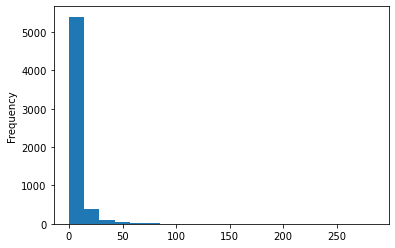

In [41]:
%matplotlib inline
#Plotting histogram to see how many items are purchased only once by customers
lf_tnx_data['frequency'].plot(kind='hist',bins=20)
print(lf_tnx_data['frequency'].describe())
#Checking the percentage of customers who are buying only once
one_time_buyers = round(sum(lf_tnx_data['frequency'] == 0)/float(len(lf_tnx_data))*(100),2)
print("Percentage of customers buying only once", one_time_buyers, "%")

# BG/NBD Model

In [42]:
#Analysis using BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(lf_tnx_data['frequency'], lf_tnx_data['recency'], lf_tnx_data['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.553097,0.010979,0.531579,0.574616
alpha,40.926113,1.188496,38.596662,43.255565
a,0.040456,0.002875,0.034821,0.046090
b,0.316101,0.018391,0.280054,0.352147


C:\Users\Gollamudi\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:256: RuntimeWarning:

overflow encountered in double_scalars



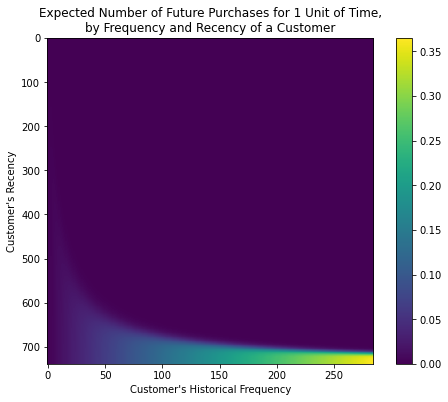

In [43]:
#Relationship between recency and frequency
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(bgf)

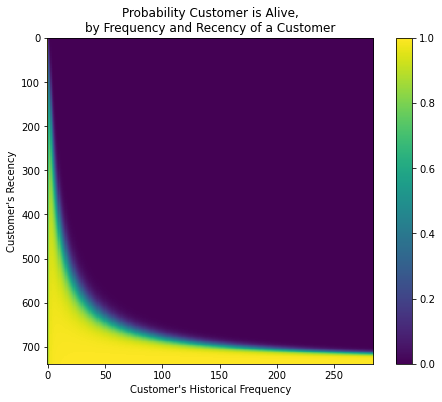

In [44]:
#Predicting the active customers
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(8,6))
plot_probability_alive_matrix(bgf)

In [45]:
#Based on historical data predicting the future number of transactions for next 10 days using BG/NBD model
t = 10
lf_tnx_data['pred_num_tnx'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tnx_data['frequency'], lf_tnx_data['recency'], lf_tnx_data['T']),2)
lf_tnx_data.sort_values(by='pred_num_tnx', ascending=False).head(10).reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_tnx
0,14911.0,284.0,737.0,738.0,811.488521,3.65
1,12748.0,206.0,735.0,735.0,203.890825,2.66
2,15311.0,201.0,738.0,738.0,332.887662,2.59
3,17841.0,193.0,736.0,737.0,323.643679,2.49
4,14606.0,181.0,735.0,736.0,150.026961,2.34
5,13089.0,161.0,735.0,737.0,554.911988,2.08
6,14156.0,147.0,729.0,738.0,775.546395,1.89
7,14527.0,135.0,735.0,737.0,169.232370,1.74
8,16422.0,118.0,721.0,738.0,206.200339,1.51
9,13798.0,101.0,730.0,731.0,297.055842,1.31


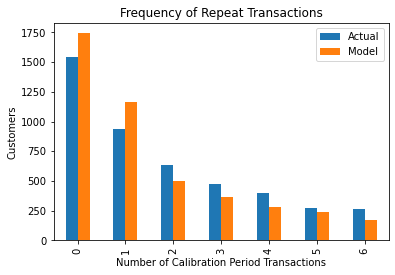

In [46]:
#Assesing the model with actual values
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

# Gamma-Gamma Model

In [47]:
#In order to use the Gamma-Gamma model we need to make sure that there is no correlation between the columns frequency and monetary_value
lf_tnx_data[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.259375
monetary_value,0.259375,1.000000


In [48]:
#checking the customers who are doing at least one repeat purchases
shortlst_customers = lf_tnx_data[lf_tnx_data['frequency']>0]
print(shortlst_customers.head().reset_index())
#Number of returning customers
print('-----------------------------------------------------------')
print("The number of returning customers are :", len(shortlst_customers))

   Customer ID  frequency  recency      T  monetary_value  pred_num_tnx
0      12346.0       10.0    400.0  725.0       35.854000          0.06
1      12347.0        7.0    402.0  404.0      548.951429          0.17
2      12348.0        4.0    363.0  438.0      140.637500          0.09
3      12349.0        4.0    717.0  735.0      822.337500          0.06
4      12352.0        8.0    356.0  392.0      200.616250          0.20
-----------------------------------------------------------
The number of returning customers are : 4398


In [49]:
lf_tnx_data = lf_tnx_data.loc[lf_tnx_data['monetary_value'] > 0, :]
#Analaysis using Gamma-Gamma model
ggf = GammaGammaFitter(penalizer_coef = 0.1)
ggf.fit(lf_tnx_data['frequency'], lf_tnx_data['monetary_value'])
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.039410,0.023862,0.992640,1.086180
q,0.197981,0.003249,0.191613,0.204349
v,0.956114,0.024721,0.907660,1.004567


In [50]:
#Estimating the average transaction value of each customer
print(ggf.conditional_expected_average_profit(lf_tnx_data['frequency'], lf_tnx_data['monetary_value']).head(10))

Customer ID
12346.0       38.955453
12347.0      617.112296
12348.0      174.547095
12349.0     1019.178605
12352.0      222.163731
12353.0      309.803775
12355.0     1343.999235
12356.0      830.610713
12357.0    21995.069891
12358.0      618.217147
dtype: float64


In [51]:
#predicting the transaction values and putting along with the predicted number of transactions
lf_tnx_data['pred_tnx_value'] = round(ggf.conditional_expected_average_profit(lf_tnx_data['frequency'], lf_tnx_data['monetary_value']),2)
lf_tnx_data.reset_index().head()

,Customer ID,frequency,recency,T,monetary_value,pred_num_tnx,pred_tnx_value
0,12346.0,10.0,400.0,725.0,35.854000,0.06,38.96
1,12347.0,7.0,402.0,404.0,548.951429,0.17,617.11
2,12348.0,4.0,363.0,438.0,140.637500,0.09,174.55
3,12349.0,4.0,717.0,735.0,822.337500,0.06,1019.18
4,12352.0,8.0,356.0,392.0,200.616250,0.20,222.16


# BG-NBD & Gamma-Gamma

In [52]:
#Split into train - test
rfm_train_test = calibration_and_holdout_data(transactions_data, 'Customer ID', 'date',
                                        calibration_period_end='2011-09-12',
                                        monetary_value_col = 'Total_Revenue')   

#Selecting only customers with positive value in the calibration period
rfm_train_test = rfm_train_test.loc[rfm_train_test['monetary_value_cal'] > 0, :]

In [53]:
#Train the BG/NBD and Gamma-Gamma model
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(rfm_train_test['frequency_cal'], rfm_train_test['recency_cal'], rfm_train_test['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 3856 subjects, a: 0.08, alpha: 50.53, b: 0.41, r: 0.95>

In [54]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(rfm_train_test['frequency_cal'],
        rfm_train_test['monetary_value_cal'])

<lifetimes.GammaGammaFitter: fitted with 3856 subjects, p: 0.79, q: 6.03, v: 1684.30>

In [55]:
#Predict the expected number of transactions in the next 90 days
predicted_bgf = bgf.predict(90,
                        rfm_train_test['frequency_cal'], 
                        rfm_train_test['recency_cal'], 
                        rfm_train_test['T_cal'])
trans_pred = predicted_bgf.fillna(0)

#Predict the average order value
monetary_pred = ggf.conditional_expected_average_profit(rfm_train_test['frequency_cal'],
                                        rfm_train_test['monetary_value_cal'])

#Putting it all together
sales_pred = trans_pred * monetary_pred

In [56]:
actual = rfm_train_test['monetary_value_holdout'] *  rfm_train_test['frequency_holdout']

In [57]:
#Evaluating the model
def evaluate(actual, sales_prediction):
    print(f"Total Sales Actual: {np.round(actual.sum())}")
    print(f"Total Sales Predicted: {np.round(sales_prediction.sum())}")
    print(f"Individual R2 score: {r2_score(actual, sales_prediction)} ")
    print(f"Individual Mean Absolute Error: {mean_absolute_error(actual, sales_prediction)}")
    plt.scatter(sales_prediction, actual)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')      
    plt.show()

Total Sales Actual: 1504023.0
Total Sales Predicted: 1223238.0
Individual R2 score: 0.5391298575485897 
Individual Mean Absolute Error: 278.0411198140317


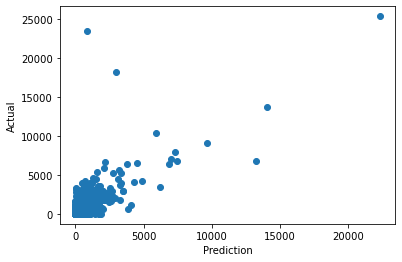

In [58]:
evaluate(actual, sales_pred)

In [59]:
mse = mean_squared_error(actual, sales_pred)

In [60]:
rmse = math.sqrt(mse)
print(rmse)

655.9139026736309


# Machine Learning Models

In [61]:
#adding month and year column by splitting the InvoiceDate column
transactions_data['Month_Year'] = transactions_data['date'].apply(lambda x: x.strftime('%b-%Y'))

In [62]:
#Monthly sales data
total_sales = transactions_data.pivot_table(index=['Customer ID'], columns=['Month_Year'], values='Total_Revenue', aggfunc='sum', fill_value=0).reset_index()
total_sales.head()

Month_Year,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12346.0,0.00,0.00,0.0,0.00,113.50,0.00,0.00,0.0,0.00,...,27.05,0.0,0.00,0.0,0.0,0.00,5.50,0.00,0.0,0.00
1,12347.0,0.00,393.01,0.0,514.71,0.00,696.49,230.02,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,609.25,1170.96,0.0,0.00
2,12348.0,0.00,113.75,0.0,0.00,0.00,302.10,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,259.6,66.75
3,12349.0,901.48,0.00,0.0,0.00,15.95,0.00,0.00,0.0,0.00,...,0.00,0.0,6.75,0.0,0.0,1306.05,1075.07,0.00,0.0,0.00
4,12350.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,301.15,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00


In [63]:
#creating CLTV column by adding all months data of individual customer
total_sales['CLTV'] = total_sales.iloc[:,2:].sum(axis=1)
total_sales.head()

Month_Year,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLTV
0,12346.0,0.00,0.00,0.0,0.00,113.50,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,5.50,0.00,0.0,0.00,448.54
1,12347.0,0.00,393.01,0.0,514.71,0.00,696.49,230.02,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,609.25,1170.96,0.0,0.00,4451.91
2,12348.0,0.00,113.75,0.0,0.00,0.00,302.10,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,259.6,66.75,822.15
3,12349.0,901.48,0.00,0.0,0.00,15.95,0.00,0.00,0.0,0.00,...,0.0,6.75,0.0,0.0,1306.05,1075.07,0.00,0.0,0.00,2403.82
4,12350.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,301.15,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,301.15


In [64]:
#Selecting the features by taking last six months data
X = total_sales[['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011']]
y = total_sales[['CLTV']]

In [65]:
#Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Random Forest Regressor

In [66]:
#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators = 20, random_state=10)

In [67]:
#Fitting the model
rfr.fit(X_train, y_train)

C:\Users\Gollamudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=20, random_state=10)

In [68]:
#Predicting on test data
y_pred = rfr.predict(X_test)

In [69]:
#Model Evaluation
#R-Square of the model
print('R-Square', metrics.r2_score(y_test, y_pred))

R-Square 0.599637033594776


In [70]:
#Let's see the MAE, MSE and RMSE values of the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1193.3321125026164
MSE: 26173413.93672415
RMSE: 5115.995889044883


Total Sales Actual: Month_Year
CLTV    3160087.0
dtype: float64
Total Sales Predicted: 2889984.0
Individual R2 score: 0.599637033594776 
Individual Mean Absolute Error: 1193.3321125026164


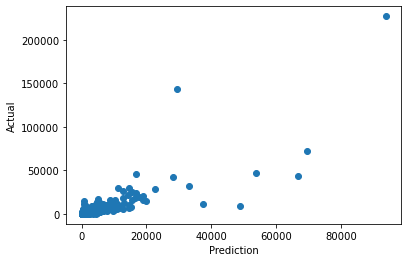

In [71]:
#Evaluating the model
def evaluate(actual, sales_prediction):
    print(f"Total Sales Actual: {np.round(actual.sum())}")
    print(f"Total Sales Predicted: {np.round(sales_prediction.sum())}")
    print(f"Individual R2 score: {r2_score(actual, sales_prediction)} ")
    print(f"Individual Mean Absolute Error: {mean_absolute_error(actual, sales_prediction)}")
    plt.scatter(sales_prediction, actual)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')      
    plt.show()

evaluate(y_test, y_pred)

# Deep Neural Network Model

In [72]:
#Building the model
def build_model():
    model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(X_train.columns), ]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])
    
    return model

model = build_model()

In [73]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [74]:
#To handle the overfitting problem while training the model using esarlystopping method
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [early]

In [75]:
#Traing the model
early_history = model.fit(X_train, y_train, 
                    epochs=50, validation_data = (X_test, y_test), callbacks=callbacks_list)

Train on 4456 samples, validate on 1486 samples
Epoch 1/50
4456/4456 [==============================] - 20s 4ms/sample - loss: 18881357.7129 - mae: 1633.8351 - mse: 18881366.0000 - val_loss: 44161404.9102 - val_mae: 1642.5596 - val_mse: 44161408.0000
Epoch 2/50
4456/4456 [==============================] - 6s 1ms/sample - loss: 9965141.0784 - mae: 1191.6320 - mse: 9965142.0000 - val_loss: 10947603.6830 - val_mae: 1150.2657 - val_mse: 10947605.0000
Epoch 3/50
4456/4456 [==============================] - 5s 1ms/sample - loss: 5670129.7778 - mae: 1073.9691 - mse: 5670128.5000 - val_loss: 9315927.2539 - val_mae: 1103.1956 - val_mse: 9315928.0000
Epoch 4/50
4456/4456 [==============================] - 6s 1ms/sample - loss: 5624507.7888 - mae: 1062.4252 - mse: 5624507.5000 - val_loss: 8667713.2546 - val_mae: 1077.1935 - val_mse: 8667712.0000
Epoch 5/50
4456/4456 [==============================] - 6s 1ms/sample - loss: 5449446.6406 - mae: 1057.4844 - mse: 5449447.5000 - val_loss: 9149764.9174 

In [76]:
#Predicting with test data
dnn_preds = model.predict(X_test)

Total Sales Actual: Month_Year
CLTV    3160087.0
dtype: float64
Total Sales Predicted: 2933703.0
Individual R2 score: 0.8952913354305666 
Individual Mean Absolute Error: 1055.8090331155358


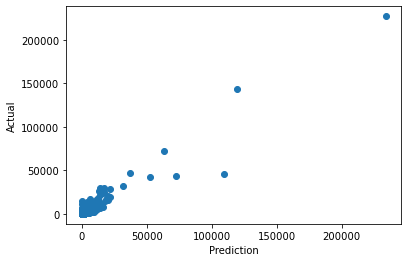

In [77]:
#Evaluating the model
def evaluate(actual, sales_prediction):
    print(f"Total Sales Actual: {np.round(actual.sum())}")
    print(f"Total Sales Predicted: {np.round(sales_prediction.sum())}")
    print(f"Individual R2 score: {r2_score(actual, sales_prediction)} ")
    print(f"Individual Mean Absolute Error: {mean_absolute_error(actual, sales_prediction)}")
    plt.scatter(sales_prediction, actual)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')      
    plt.show()

evaluate(y_test, dnn_preds)

In [78]:
dnn_mse = mean_squared_error(y_test, dnn_preds)

In [79]:
dnn_rmse = math.sqrt(dnn_mse)
print(dnn_rmse)

2616.3422109878966
